In [1]:
# Julia 1.2.0
import PyPlot; const plt = PyPlot;

# Problem 3
## Pin-jointed truss

In [2]:
P = 100;
R = 350;

In [3]:
Pu = Dict("Howe"=>[], "Pratt"=>[])
Pl = Dict("Howe"=>[], "Pratt"=>[])
D = Dict("Howe"=>[], "Pratt"=>[])
Px = []
x = []
for i =1:3
    push!(Px, P*15i)
    push!(x, i*15+0.001)
    push!(x, (i+1)*15-0.001)
    
    Di = sqrt(41)/4*(P*i-R)
    Pui = 15/12*(P*i^2-R*i)-1/12*sum(Px)
    push!(D["Pratt"], Di)
    push!(D["Pratt"], Di)
    push!(Pu["Pratt"], Pui)
    push!(Pu["Pratt"], Pui)
    push!(Pl["Pratt"], -Pui-5/4*(P*i-R))
    push!(Pl["Pratt"], -Pui-5/4*(P*i-R))
    
    Di = sqrt(41)/4*(R-P*i)
    push!(D["Howe"], Di)
    push!(D["Howe"], Di)
    push!(Pl["Howe"], (4/sqrt(41)*Di*15*i+sum(Px))/12)
    push!(Pl["Howe"], (4/sqrt(41)*Di*15*i+sum(Px))/12)
    push!(Pu["Howe"], -5/sqrt(41)*Di-(4/sqrt(41)*Di*15*i+sum(Px))/12)
    push!(Pu["Howe"], -5/sqrt(41)*Di-(4/sqrt(41)*Di*15*i+sum(Px))/12)
end    

for (i,j) = zip(5:8, 0:2)
    push!(x, (i-1)*15+0.001)
    push!(x, (i)*15-0.001)
    push!(D["Pratt"], D["Pratt"][i-3*j])
    push!(D["Pratt"], D["Pratt"][i-3*j+1])
    push!(Pu["Pratt"], Pu["Pratt"][i-3*j])
    push!(Pu["Pratt"], Pu["Pratt"][i-3*j+1])
    push!(Pl["Pratt"], Pl["Pratt"][i-3*j])
    push!(Pl["Pratt"], Pl["Pratt"][i-3*j+1])
    push!(D["Howe"], D["Howe"][i-3*j])
    push!(D["Howe"], D["Howe"][i-3*j+1])
    push!(Pu["Howe"] , Pu["Howe"][i-3*j])
    push!(Pu["Howe"] , Pu["Howe"][i-3*j+1])
    push!(Pl["Howe"] , Pl["Howe"][i-3*j])
    push!(Pl["Howe"] , Pl["Howe"][i-3*j+1])
end

In [4]:
M(x) = R*x-P*(x-15)*(x>15)-P*(x-2*15)*(x>2*15)-P*(x-3*15)*(x>3*15)-P*(x-4*15)*(x>4*15)-P*(x-5*15)*(x>5*15)-P*(x-6*15)*(x>6*15)-P*(x-7*15)*(x>7*15)
V(x) = R-P*(x>15)-P*(x>2*15)-P*(x>3*15)-P*(x>4*15)-P*(x>5*15)-P*(x>6*15)-P*(x>7*15) 

V (generic function with 1 method)

### Upper and lower chord forces vs. beam moment

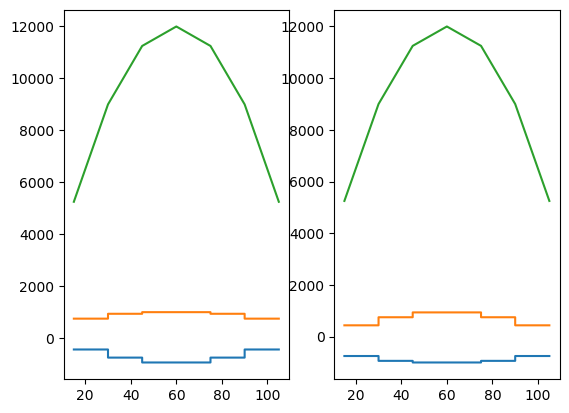

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000033258E80>

In [5]:
fig, (ax, ax2) = plt.subplots(1,2)
# ax.axhline(y=0, color='k')
ax.plot(x,Pu["Pratt"], label="Pratt")
ax.plot(x,Pl["Pratt"], label="Pratt")
ax.plot(x,map(M, x), label="Pratt")

# ax2.axhline(y=0, color='k')
ax2.plot(x,Pu["Howe"], label="Howe")
ax2.plot(x,Pl["Howe"], label="Howe")
ax2.plot(x,map(M, x))


### Diagonal member force vs. beam shear

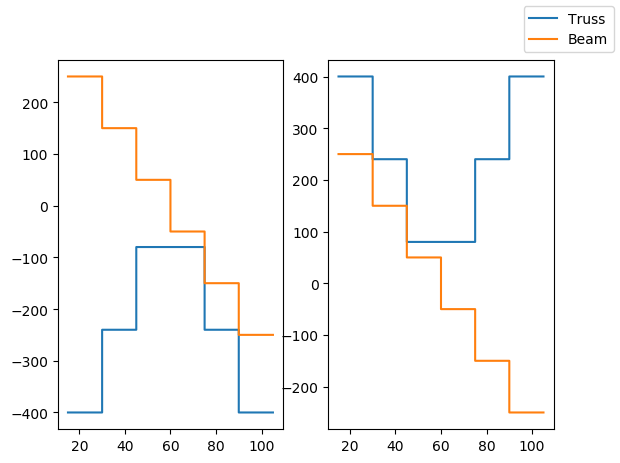

PyObject <matplotlib.legend.Legend object at 0x00000000332E2780>

In [6]:
fig2, (ax3, ax4) = plt.subplots(1,2)
ax3.plot(x, D["Pratt"], label="Truss")
ax3.plot(x,map(V, x), label="Beam")
ax4.plot(x,D["Howe"])
ax4.plot(x,map(V, x))
fig2.legend()

### Vertical member force vs. beam shear

In [7]:
V(20)

250

In [8]:
M(30)

9000

In [10]:
Pl["Pratt"][1]

750.0